# 可选实验室：使用Scikit-Learn进行线性回归

存在一个开源、商业可用的机器学习工具包叫做[scikit-learn](https://scikit-learn.org/stable/index.html)。这个工具包包含了许多你在本课程中将使用的算法的实现。

## 目标
在这个实验室中，你将：
- 利用scikit-learn实现使用梯度下降的线性回归

## 工具
你将使用scikit-learn的函数，以及matplotlib和NumPy。

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc

np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号



# 梯度下降
Scikit-learn有一个梯度下降回归模型[sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor)。像你以前实现的梯度下降一样，这个模型在输入进行归一化后性能最好。[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)将执行z-score标准化，就像以前的实验室一样。这里它被称为“标准分数”。

### 加载数据集

In [30]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']



### 缩放/归一化训练数据

In [31]:

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"原始X每列的峰值到峰值范围: {np.ptp(X_train, axis=0)}")
print(f"归一化X每列的峰值到峰值范围: {np.ptp(X_norm, axis=0)}")

原始X每列的峰值到峰值范围: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
归一化X每列的峰值到峰值范围: [5.85 6.14 2.06 3.69]




    原始X每列的峰值到峰值范围: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
    归一化X每列的峰值到峰值范围: [5.85 6.14 2.06 3.69]

### 创建并拟合回归模型

In [32]:

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"完成的迭代次数: {sgdr.n_iter_}, 权重更新次数: {sgdr.t_}")

SGDRegressor()
完成的迭代次数: 150, 权重更新次数: 14851.0




    SGDRegressor()
    完成的迭代次数: 123, 权重更新次数: 12178.0


### 查看参数
请注意，参数与*归一化后*的输入数据相关联。拟合参数与以前的实验室中的数据非常接近。

In [33]:

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"模型参数:                   w: {w_norm}, b:{b_norm}")
print("以前实验室的模型参数: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")


模型参数:                   w: [110.36 -21.2  -32.63 -37.99], b:[363.14]
以前实验室的模型参数: w: [110.56 -21.27 -32.71 -37.97], b: 363.16



    模型参数:                   w: [110.17 -21.06 -32.47 -38.05], b:[363.16]
    以前实验室的模型参数: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### 进行预测
预测训练数据的目标。使用`predict`例程并使用$w$和$b$进行计算。

In [34]:
# 使用sgdr.predict()进行预测
y_pred_sgd = sgdr.predict(X_norm)
# 使用w,b进行预测
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"使用np.dot()和sgdr.predict进行预测是否匹配: {(y_pred == y_pred_sgd).all()}")

print(f"对训练集的预测:\n{y_pred[:4]}")
print(f"目标值 \n{y_train[:4]}")


使用np.dot()和sgdr.predict进行预测是否匹配: True
对训练集的预测:
[295.2  485.85 389.49 492.02]
目标值 
[300.  509.8 394.  540. ]



    使用np.dot()和sgdr.predict进行预测是否匹配: True
    对训练集的预测:
    [295.17 485.94 389.62 492.1 ]
    目标值 
    [300.  509.8 394.  540. ]

### 绘制结果
让我们绘制预测与目标值的图表。

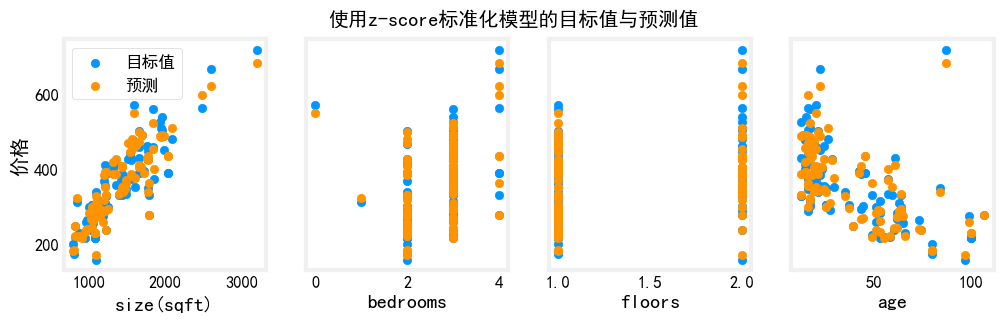

In [35]:
  # 绘制预测和目标值与原始特征的关系  
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='目标值')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred, color=dlc["dlorange"], label='预测')
ax[0].set_ylabel("价格")
ax[0].legend()
fig.suptitle("使用z-score标准化模型的目标值与预测值")
plt.show()



## 祝贺你！
在这个实验室中，你：
- 利用了一个开源的机器学习工具包，scikit-learn
- 实现了使用梯度下降和特征归一化的线性回归。